In [19]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools


In [50]:
def theNN(X,Y):
    model = Sequential()
#     print("The weights at the start are ")
#     print(model.layers[0].get_weights()[0])
    
    model.add(Dense(2, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))
    
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print(X_train.shape,Y_train.shape)
    print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
    print(Y_train.shape)
    Y_test = to_categorical(Y_test)
   
    e = 50   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=2)
    
    
#     print("The weights at the end are ")
#     print(model.layers[0].get_weights()[]) 
#  Ways to gettt and set weights https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/ 
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    

    # Plot decision boundary

    #print(X_test)
    # print(Y_test)
    # print(Y_tt)
    #Y_test = Y_test.astype(np.int_)
    # X_testing = X[:training_split, :]
    # Targets_testing = Y[:training_split]

    # Plot decision boundary
#     plot_decision_regions(X_test, Y_test, clf=model, legend=2)
#     plt.show()



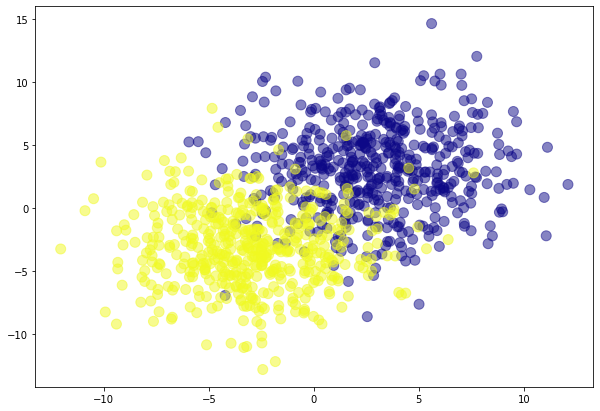

(700, 2) (700,)
(300, 2) (300,)
(700, 2)
Epoch 1/50
22/22 - 0s - loss: 0.7880 - accuracy: 0.3671
Epoch 2/50
22/22 - 0s - loss: 0.7295 - accuracy: 0.3257
Epoch 3/50
22/22 - 0s - loss: 0.6896 - accuracy: 0.5414
Epoch 4/50
22/22 - 0s - loss: 0.6465 - accuracy: 0.7257
Epoch 5/50
22/22 - 0s - loss: 0.5871 - accuracy: 0.7257
Epoch 6/50
22/22 - 0s - loss: 0.5325 - accuracy: 0.7357
Epoch 7/50
22/22 - 0s - loss: 0.4916 - accuracy: 0.7529
Epoch 8/50
22/22 - 0s - loss: 0.4615 - accuracy: 0.7829
Epoch 9/50
22/22 - 0s - loss: 0.4403 - accuracy: 0.7871
Epoch 10/50
22/22 - 0s - loss: 0.4250 - accuracy: 0.7886
Epoch 11/50
22/22 - 0s - loss: 0.4133 - accuracy: 0.7957
Epoch 12/50
22/22 - 0s - loss: 0.4044 - accuracy: 0.8014
Epoch 13/50
22/22 - 0s - loss: 0.3969 - accuracy: 0.8043
Epoch 14/50
22/22 - 0s - loss: 0.3915 - accuracy: 0.8086
Epoch 15/50
22/22 - 0s - loss: 0.3832 - accuracy: 0.8200
Epoch 16/50
22/22 - 0s - loss: 0.3801 - accuracy: 0.8157
Epoch 17/50
22/22 - 0s - loss: 0.3747 - accuracy: 0.8200

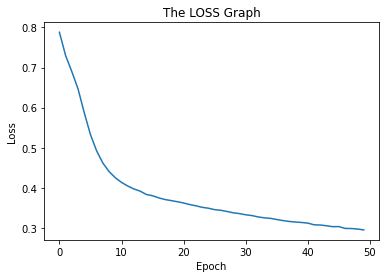

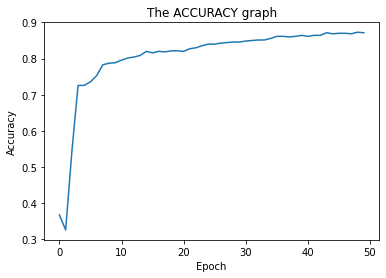

Test results - Loss: 0.370023638010025 - Accuracy: 87.00000047683716%


In [51]:
def main():
    #Class 1
    mean = [3,3]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,500)

    #print(Class1)

    #print(Class1)

    mean = [-3,-3]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,500)

    # mean = [-5,5]
    # cov = [[5,0],
    #        [0,5]] 
    # Class3 = np.random.multivariate_normal(mean,cov,500)


    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*500 + [1]*500)
    #print(Y)

    one_hot_labels = np.zeros((1000, 2))

    for i in range(1000):
        one_hot_labels[i, Y[i]] = 1

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    theNN(X,Y)
    
if __name__ == "__main__":
    main()